<a href="https://colab.research.google.com/github/venturaoscar610-max/Data110-Fall2025/blob/main/Project_1_DATA_Oscar_Ventura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('nfl_team_stats_2002-2024.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
print("First 5 rows of data:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nAvailable Columns:")
print(df.columns.tolist())

First 5 rows of data:
   season week        date  time_et  neutral       away        home  \
0    2002    1  2002-09-05  8:30 PM    False      49ers      Giants   
1    2002    1  2002-09-08  1:00 PM    False      Colts     Jaguars   
2    2002    1  2002-09-08  1:00 PM    False  Cardinals  Commanders   
3    2002    1  2002-09-08  1:00 PM    False      Lions    Dolphins   
4    2002    1  2002-09-08  1:00 PM    False     Eagles      Titans   

   score_away  score_home  first_downs_away  ...  redzone_comp_home  \
0          16          13                13  ...                  0   
1          28          25                18  ...                  0   
2          23          31                14  ...                  0   
3          21          49                15  ...                  0   
4          24          27                17  ...                  0   

   redzone_att_home  fumbles_away  fumbles_home  interceptions_away  \
0                 6             0             0      

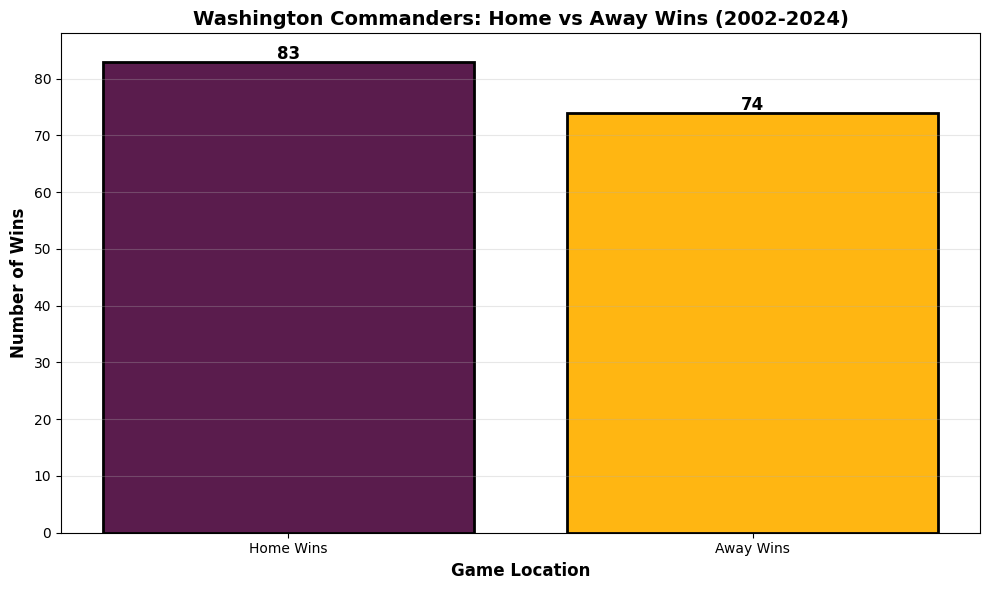

This visualization shows that the Commanders have performed differently at home vs away.


In [ ]:
# VISUALIZATION 1: Commanders Home vs Away Wins
# This bar chart compares how many wins the Commanders have at home vs away

# Calculate wins directly
commanders_home = df[df['home'] == 'Commanders']
commanders_away = df[df['away'] == 'Commanders']

# Count wins
commanders_home_wins = len(commanders_home[commanders_home['score_home'] > commanders_home['score_away']])
commanders_away_wins = len(commanders_away[commanders_away['score_away'] > commanders_away['score_home']])

# Create the bar chart
plt.figure(figsize=(10, 6))

categories = ['Home Wins', 'Away Wins']
wins = [commanders_home_wins, commanders_away_wins]
colors = ['#5A1C4D', '#FFB612']  # Commanders team colors (maroon and gold)

plt.bar(categories, wins, color=colors, edgecolor='black', linewidth=2)

# Label the axes
plt.xlabel('Game Location', fontsize=12, fontweight='bold')
plt.ylabel('Number of Wins', fontsize=12, fontweight='bold')
plt.title('Washington Commanders: Home vs Away Wins (2002-2024)', fontsize=14, fontweight='bold')

# Add value labels on top of bars
for i, v in enumerate(wins):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold', fontsize=12)

plt.ylim(0, max(wins) + 5)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("This visualization shows that the Commanders have performed differently at home vs away.")

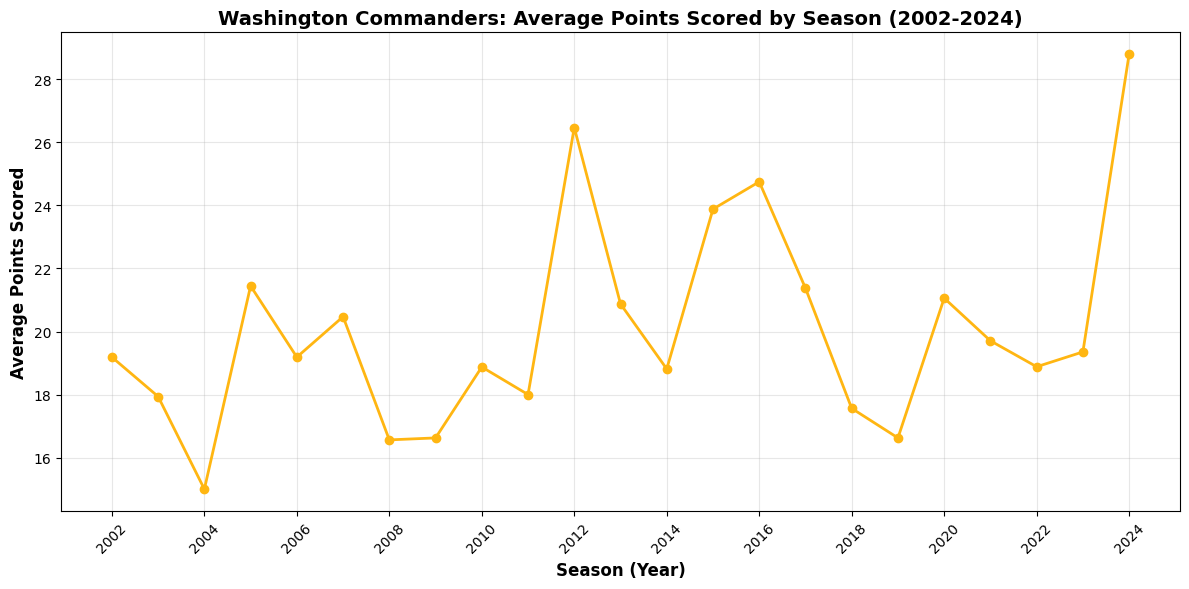

This line chart shows how the Commanders' offensive scoring has changed over time.


In [ ]:
# VISUALIZATION 2: Score Trends Over Time
# This line chart shows how the Commanders' average points scored changed by season

# Filter for all Commanders games (home and away)
commanders_home = df[df['home'] == 'Commanders']
commanders_away = df[df['away'] == 'Commanders']

# Create a list of all Commanders games with season and points scored
commanders_scores = []

# Add home games
for idx, row in commanders_home.iterrows():
    commanders_scores.append({'season': row['season'], 'points_scored': row['score_home']})

# Add away games
for idx, row in commanders_away.iterrows():
    commanders_scores.append({'season': row['season'], 'points_scored': row['score_away']})

# Convert to DataFrame
commanders_df = pd.DataFrame(commanders_scores)

# Calculate average points scored by season
avg_points_by_season = commanders_df.groupby('season')['points_scored'].mean()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(avg_points_by_season.index, avg_points_by_season.values,
         marker='o', linewidth=2, markersize=6, color='#FFB612')

# Label the axes
plt.xlabel('Season (Year)', fontsize=12, fontweight='bold')
plt.ylabel('Average Points Scored', fontsize=12, fontweight='bold')
plt.title('Washington Commanders: Average Points Scored by Season (2002-2024)', fontsize=14, fontweight='bold')

# Format x-axis to show every other year for readability
plt.xticks(avg_points_by_season.index[::2], rotation=45)

# Add gridlines
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("This line chart shows how the Commanders' offensive scoring has changed over time.")

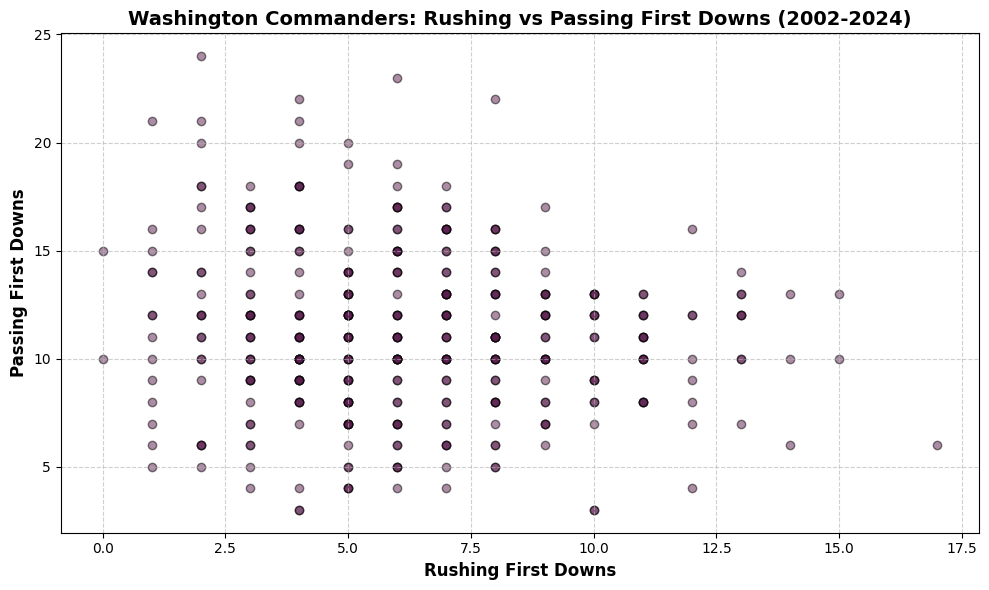

This scatter plot shows the relationship between the Commanders' rushing and passing first downs in each game.


In [ ]:
# TODO: Visualization 3 - Commanders first downs
# This scatter plot shows the Commanders' rushing first downs vs passing first downs

# Filter for Commanders games (home and away) and extract first down data
commanders_games = df[(df['home'] == 'Commanders') | (df['away'] == 'Commanders')].copy()

# Create separate columns for rushing and passing first downs for Commanders
def get_commanders_first_downs(row):
    if row['home'] == 'Commanders':
        return row['first_downs_from_rushing_home'], row['first_downs_from_passing_home']
    else: # away game
        return row['first_downs_from_rushing_away'], row['first_downs_from_passing_away']

commanders_games[['rushing_first_downs', 'passing_first_downs']] = commanders_games.apply(get_commanders_first_downs, axis=1, result_type='expand')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(commanders_games['rushing_first_downs'], commanders_games['passing_first_downs'],
            alpha=0.5, color='#5A1C4D', edgecolors='black', linewidth=1) # Using Commanders colors

# Label the axes
plt.xlabel('Rushing First Downs', fontsize=12, fontweight='bold')
plt.ylabel('Passing First Downs', fontsize=12, fontweight='bold')
plt.title('Washington Commanders: Rushing vs Passing First Downs (2002-2024)', fontsize=14, fontweight='bold')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("This scatter plot shows the relationship between the Commanders' rushing and passing first downs in each game.")